# Benchmarking Optimizers

In [1]:
%matplotlib inline

In [2]:
from tensorflow import keras
from tensorflow.keras import datasets
import matplotlib.pylab as plt
import numpy as np

## MNIST

In [3]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

x_train = keras.utils.normalize(x_train, axis=1)
x_test = keras.utils.normalize(x_test, axis=1)

x_train.shape, y_train.shape, x_test.shape, y_test.shape  

((60000, 28, 28), (60000, 10), (10000, 28, 28), (10000, 10))

In [4]:
def train_mnist(optimizer):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=x_train[0].shape),
        keras.layers.Dense(250, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.categorical_crossentropy,
        metrics=['accuracy']
    )

    history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    verbose=False,
                    shuffle=True,
                    validation_data=(x_test, y_test))

    return history, model

In [5]:
mnist = {
  'sgd': {'loss': [], 'acc': [], 'val_loss': [], 'val_acc': [], 'history': []},
  'rmsprop': {'loss': [], 'acc': [], 'val_loss': [], 'val_acc': [], 'history': []},
  'adagrad': {'loss': [], 'acc': [], 'val_loss': [], 'val_acc': [], 'history': []},
  'adam': {'loss': [], 'acc': [], 'val_loss': [], 'val_acc': [], 'history': []}
}
for optimizer in ['sgd', 'rmsprop', 'adagrad', 'adam']:
    print('--- {} ---'.format(optimizer))
    for i in range(10):
        print('starting ', i)
        history, model = train_mnist(optimizer)
        train_loss, train_accuracy = model.evaluate(x_train, y_train, verbose=False)
        val_loss, val_accuracy = model.evaluate(x_test, y_test, verbose=False)
        mnist[optimizer]['loss'].append(train_loss)
        mnist[optimizer]['acc'].append(train_accuracy)
        mnist[optimizer]['val_loss'].append(val_loss)
        mnist[optimizer]['val_acc'].append(val_accuracy)
        mnist[optimizer]['history'].append(history)

--- sgd ---
starting  0
starting  1
starting  2
starting  3
starting  4
starting  5
starting  6
starting  7
starting  8
starting  9
--- rmsprop ---
starting  0
starting  1
starting  2
starting  3
starting  4
starting  5
starting  6
starting  7
starting  8
starting  9
--- adagrad ---
starting  0
starting  1
starting  2
starting  3
starting  4
starting  5
starting  6
starting  7
starting  8
starting  9
--- adam ---
starting  0
starting  1
starting  2
starting  3
starting  4
starting  5
starting  6
starting  7
starting  8
starting  9


In [6]:
for opt in ['sgd', 'rmsprop', 'adagrad', 'adam']:
    for key in ['acc', 'val_acc', 'loss', 'val_loss']:
        print(opt, key, np.mean(mnist[opt][key]))

sgd acc 0.89526004
sgd val_acc 0.90259
sgd loss 0.38073382255335647
sgd val_loss 0.366636111651659
rmsprop acc 0.99391
rmsprop val_acc 0.97603
rmsprop loss 0.024558540175466333
rmsprop val_loss 0.08318958133902402
adagrad acc 0.91022176
adagrad val_acc 0.91423
adagrad loss 0.32356735133270426
adagrad val_loss 0.3172148352599144
adam acc 0.99524164
adam val_acc 0.97532004
adam loss 0.02212322289508457
adam val_loss 0.08060189968072809


[]

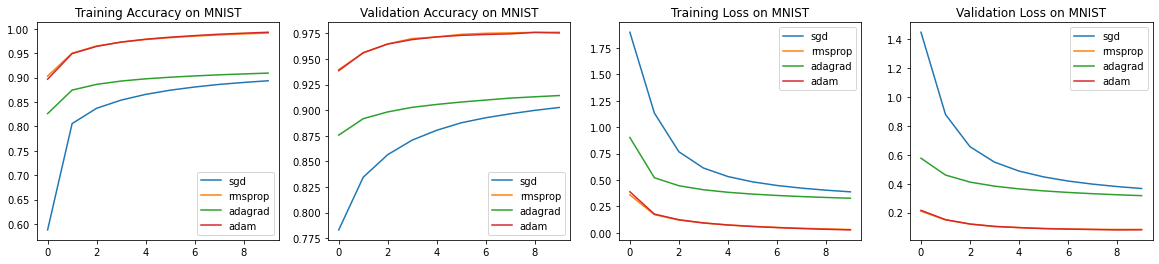

In [8]:
plt.figure(figsize=(20,4))
for i in range(4):
    plt.subplot(1,4,i+1)
    key = ['accuracy', 'val_accuracy', 'loss', 'val_loss'][i]
    title = ['Training Accuracy on MNIST', 'Validation Accuracy on MNIST', 'Training Loss on MNIST', 'Validation Loss on MNIST'][i]
    for opt in ['sgd', 'rmsprop', 'adagrad', 'adam']:
        hist = np.zeros(10)
        for h in mnist[opt]['history']:
              hist += np.array(h.history[key])
        mean = hist / 10
        plt.plot(mean, label=opt)
    plt.legend()
    plt.title(title)
plt.plot()

## CIFAR10

In [9]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

x_train = keras.utils.normalize(x_train, axis=1)
x_test = keras.utils.normalize(x_test, axis=1)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 10), (10000, 32, 32, 3), (10000, 10))

In [10]:
def train_cifar10(optimizer):
    model = keras.Sequential([
        keras.layers.Conv2D(32, kernel_size=(2, 2), padding='same', activation='relu', input_shape=x_train[0].shape),
        keras.layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(3,3)),
        keras.layers.Dropout(0.3),

        keras.layers.Conv2D(16, kernel_size=(2, 2), padding='same', activation='relu'),
        keras.layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2,2)),
        keras.layers.Dropout(0.3),

        keras.layers.Flatten(),
        keras.layers.Dense(1024, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.categorical_crossentropy,
        metrics=['accuracy']
    )

    history = model.fit(x_train, y_train,
                      batch_size=128,
                      epochs=30,
                      shuffle=True,
                      verbose=False,
                      validation_data=(x_test, y_test))

    return history, model

In [ ]:
cifar10 = {
    'sgd': {'loss': [], 'acc': [], 'val_loss': [], 'val_acc': [], 'history': []},
    'rmsprop': {'loss': [], 'acc': [], 'val_loss': [], 'val_acc': [], 'history': []},
    'adagrad': {'loss': [], 'acc': [], 'val_loss': [], 'val_acc': [], 'history': []},
    'adam': {'loss': [], 'acc': [], 'val_loss': [], 'val_acc': [], 'history': []}
  }
for optimizer in ['sgd', 'rmsprop', 'adagrad', 'adam']:
    print('--- {} ---'.format(optimizer))
    for i in range(10):
        print('starting ', i)
        history, model = train_cifar10(optimizer)
        train_loss, train_accuracy = model.evaluate(x_train, y_train, verbose=False)
        val_loss, val_accuracy = model.evaluate(x_test, y_test, verbose=False)
        cifar10[optimizer]['loss'].append(train_loss)
        cifar10[optimizer]['acc'].append(train_accuracy)
        cifar10[optimizer]['val_loss'].append(val_loss)
        cifar10[optimizer]['val_acc'].append(val_accuracy)
        cifar10[optimizer]['history'].append(history)

--- sgd ---
starting  0
starting  1


In [ ]:
plt.figure(figsize=(20,4))
for i in range(4):
    plt.subplot(1,4,i+1)
    key = ['acc', 'val_acc', 'loss', 'val_loss'][i]
    title = ['Training Accuracy on CIFAR10', 'Validation Accuracy on CIFAR10', 'Training Loss on CIFAR10', 'Validation Loss on CIFAR10'][i]
    for opt in ['sgd', 'rmsprop', 'adagrad', 'adam']:
        hist = np.zeros(30)
        for h in cifar10[opt]['history']:
          hist += np.array(h.history[key])
        mean = hist / 10
        plt.plot(mean, label=opt)
    plt.legend()
    plt.title(title)
plt.plot()

In [ ]:
for opt in ['sgd', 'rmsprop', 'adagrad', 'adam']:
    for key in ['acc', 'val_acc', 'loss', 'val_loss']:
        print(opt, key, np.mean(cifar10[opt][key]))

## Text classification with preprocessed text: Movie reviews (8k)

https://www.tensorflow.org/tutorials/keras/text_classification

In [ ]:
import tensorflow_datasets as tfds
(train_data, test_data), info = tfds.load(
    'imdb_reviews/subwords8k',
    split = (tfds.Split.TRAIN, tfds.Split.TEST),
    as_supervised=True,
    with_info=True)

encoder = info.features['text'].encoder

BUFFER_SIZE = 1000

train_batches = (
    train_data
    .shuffle(BUFFER_SIZE)
    .padded_batch(32, train_data.output_shapes))

test_batches = (
    test_data
    .padded_batch(32, train_data.output_shapes))

In [ ]:
def train_imdb(optimizer):
    model = keras.Sequential([
        keras.layers.Embedding(encoder.vocab_size, 16),
        keras.layers.GlobalAveragePooling1D(),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_batches,
                        epochs=10,
                        verbose=False,
                        shuffle=True,
                        validation_data=test_batches,
                        validation_steps=30)

    return history, model

In [ ]:
imdb = {
  'sgd': {'loss': [], 'acc': [], 'val_loss': [], 'val_acc': [], 'history': []},
  'rmsprop': {'loss': [], 'acc': [], 'val_loss': [], 'val_acc': [], 'history': []},
  'adagrad': {'loss': [], 'acc': [], 'val_loss': [], 'val_acc': [], 'history': []},
  'adam': {'loss': [], 'acc': [], 'val_loss': [], 'val_acc': [], 'history': []}
}
for optimizer in ['sgd', 'rmsprop', 'adagrad', 'adam']:
    print('--- {} ---'.format(optimizer))
    for i in range(10):
        print('starting ', i)
        history, model = train_imdb(optimizer)
        train_loss, train_accuracy = model.evaluate(train_batches, verbose=False)
        val_loss, val_accuracy = model.evaluate(test_batches, verbose=False)
        imdb[optimizer]['loss'].append(train_loss)
        imdb[optimizer]['acc'].append(train_accuracy)
        imdb[optimizer]['val_loss'].append(val_loss)
        imdb[optimizer]['val_acc'].append(val_accuracy)
        imdb[optimizer]['history'].append(history)

In [ ]:
for opt in ['sgd', 'rmsprop', 'adagrad', 'adam']:
    for key in ['acc', 'val_acc', 'loss', 'val_loss']:
        print(opt, key, np.mean(imdb[opt][key]))

In [ ]:
plt.figure(figsize=(20,4))
for i in range(4):
    plt.subplot(1,4,i+1)
    key = ['acc', 'val_acc', 'loss', 'val_loss'][i]
    title = ['Training Accuracy on IMDB 8K', 'Validation Accuracy on IMDB 8K', 'Training Loss on IMDB 8K', 'Validation Loss on IMDB 8K'][i]
    for opt in ['sgd', 'rmsprop', 'adagrad', 'adam']:
        hist = np.zeros(10)
        for h in imdb[opt]['history']:
            hist += np.array(h.history[key])
        mean = hist / 10
        plt.plot(mean, label=opt)
    plt.legend()
    plt.title(title)
plt.plot()